In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

2024-03-31 01:06:10.470016: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 01:06:10.471946: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 01:06:10.504681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 01:06:11.021459: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = data
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


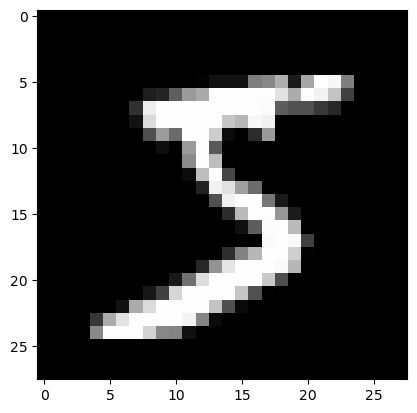

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
# one_hot encoding preprocess data
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

In [8]:
y_test_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train /= 255
X_test /= 255

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/ali/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train_encoded,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8381 - loss: 0.5618 - val_accuracy: 0.9543 - val_loss: 0.1517
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9560 - loss: 0.1465 - val_accuracy: 0.9627 - val_loss: 0.1292
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9710 - loss: 0.0959 - val_accuracy: 0.9661 - val_loss: 0.1145
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9791 - loss: 0.0703 - val_accuracy: 0.9696 - val_loss: 0.1041
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9812 - loss: 0.0582 - val_accuracy: 0.9710 - val_loss: 0.1002
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9855 - loss: 0.0449 - val_accuracy: 0.9718 - val_loss: 0.1113
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9896 - loss: 0.0344 - val_accuracy: 0.9718 - val_loss: 0.1107
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9899 - loss: 0.0304 - val_accu

In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

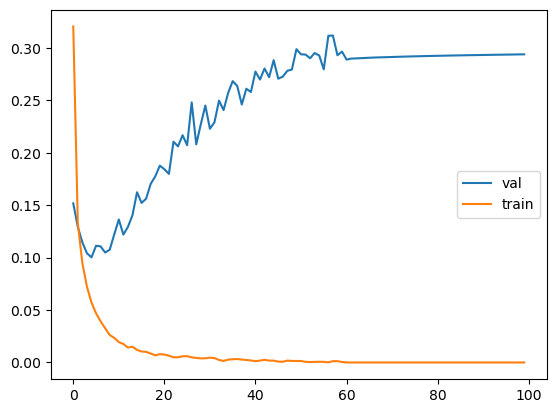

In [16]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

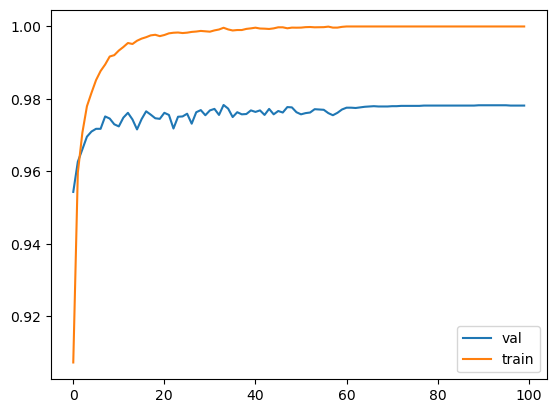

In [17]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

In [18]:
loss, acc = model.evaluate(X_test, y_test_encoded)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9773 - loss: 0.2720

Testing loss: 0.23, acc: 0.98%


In [19]:
predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


In [20]:
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test)

predicted:
[7 2 1 ... 4 5 6]
True Label:
[7 2 1 ... 4 5 6]


Text(0, 0.5, 'True label')

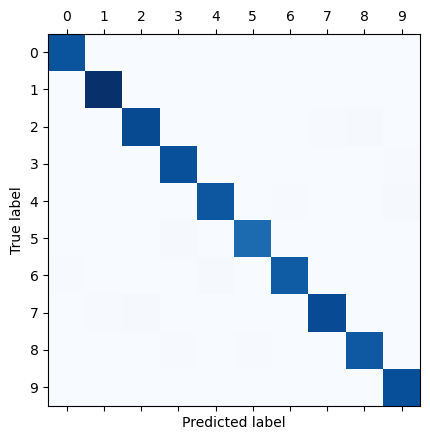

In [22]:
plt.matshow(confusion_matrix(y_test, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [23]:
confusion_matrix(y_test, predicted_classes)

array([[ 970,    1,    1,    2,    0,    0,    2,    2,    2,    0],
       [   0, 1126,    2,    0,    0,    2,    2,    1,    2,    0],
       [   1,    1, 1011,    1,    2,    0,    2,    5,    9,    0],
       [   1,    0,    4,  989,    0,    4,    0,    3,    1,    8],
       [   0,    2,    2,    0,  958,    1,    6,    1,    2,   10],
       [   2,    0,    0,   10,    1,  870,    3,    2,    4,    0],
       [   5,    3,    2,    1,    9,    4,  933,    0,    1,    0],
       [   0,    5,    9,    2,    1,    0,    0, 1006,    1,    4],
       [   0,    0,    3,    7,    0,    5,    4,    2,  950,    3],
       [   1,    3,    0,    1,    4,    3,    1,    4,    1,  991]])